In [4]:
import pickle

data=pickle.load(open('data.pickle','rb'))
target=pickle.load(open('target.pickle','rb'))
data=data/255.0

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
history=model.fit(data,target,batch_size=32,epochs=10)

Epoch 1/10
24946/24946 [==============================] - 575s 23ms/step - loss: 0.6366 - acc: 0.6307
Epoch 2/10
24946/24946 [==============================] - 579s 23ms/step - loss: 0.5244 - acc: 0.7369
Epoch 3/10
24946/24946 [==============================] - 572s 23ms/step - loss: 0.4682 - acc: 0.7776
Epoch 4/10
24946/24946 [==============================] - 569s 23ms/step - loss: 0.4244 - acc: 0.8024
Epoch 5/10
24946/24946 [==============================] - 568s 23ms/step - loss: 0.3769 - acc: 0.8264
Epoch 6/10
24946/24946 [==============================] - 6165s 247ms/step - loss: 0.3246 - acc: 0.8528
Epoch 7/10
24946/24946 [==============================] - 567s 23ms/step - loss: 0.2707 - acc: 0.8821
Epoch 8/10
24946/24946 [==============================] - 570s 23ms/step - loss: 0.2164 - acc: 0.9066
Epoch 9/10
24946/24946 [==============================] - 576s 23ms/step - loss: 0.1670 - acc: 0.9323
Epoch 10/10
24946/24946 [==============================] - 575s 23ms/step - loss

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 256)       2560      
_________________________________________________________________
activation_3 (Activation)    (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 256)       590080    
_________________________________________________________________
activation_4 (Activation)    (None, 22, 22, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30976)             0         
__________

Text(0.5, 0, 'loss')

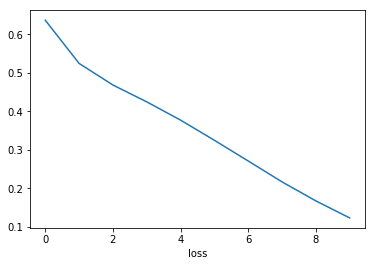

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.xlabel('loss')

Text(0.5, 0, 'loss')

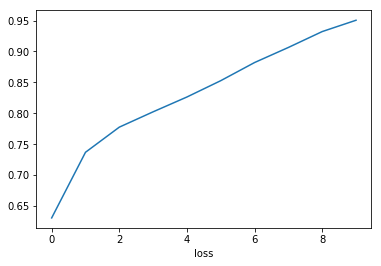

In [11]:
plt.plot(history.history['acc'])
plt.xlabel('Accuracy')
plt.xlabel('loss')

In [12]:
model.save_weights('CNN_for_Cats_Dogs.h5')